In [6]:
import sys
from pathlib import Path

# 현재 노트북의 디렉토리를 sys.path에 추가
notebook_path = Path().resolve()
sys.path.append(str(notebook_path.parent.parent))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from glob import glob
import os

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [7]:
project_root = Path(os.getcwd()).parent.parent

In [ ]:
# 설정 파일에서 경로 정보 읽기
traindata_dir = project_root / config['data']['train_dir']
traindata_info_file = project_root / config['data']['train_info_file']
testdata_dir = project_root / config['data']['test_dir']
testdata_info_file = project_root / config['data']['test_info_file']

# 학습 데이터와 테스트 데이터의 CSV 파일을 읽기
train_data = pd.read_csv(traindata_info_file)
test_data = pd.read_csv(testdata_info_file)

# 이미지 파일 경로를 glob을 이용해 읽어오기
train_images = glob(str(traindata_dir / '*/*'))
test_images = glob(str(testdata_dir / '*'))

print(f"Number of train images: {len(train_images)}")
print(f"Number of test images: {len(test_images)}")

def extract_pixel_features_optimized(image_path, size=(64, 64)):
    with Image.open(image_path) as img:
        img = img.convert('RGB')  # 모든 이미지를 RGB로 변환
        img.thumbnail(size)
        img_array = np.array(img)
        flattened = img_array.flatten()
        return np.nan_to_num(flattened)  # NaN을 0으로 대체
    

# 학습 데이터에서 픽셀 특징 추출
train_features = [extract_pixel_features_optimized(img_path) for img_path in train_images]
test_features = [extract_pixel_features_optimized(img_path) for img_path in test_images]

# 데이터프레임 생성
train_features_df = pd.DataFrame(train_features)
test_features_df = pd.DataFrame(test_features)


In [ ]:
''' Input에 NaN값으로 코드 사용 불가능 밑의 코드에서 fillna로 임의로 NaN값 처리'''

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(train_features_df)
X_test = scaler.transform(test_features_df)

# t-SNE 모델 설정
tsne = TSNE(n_components=2, random_state=42)

# t-SNE 적용
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.transform(X_test)

# 결과를 데이터프레임으로 변환
train_tsne_df = pd.DataFrame(X_train_tsne, columns=['Dim1', 'Dim2'])
test_tsne_df = pd.DataFrame(X_test_tsne, columns=['Dim1', 'Dim2'])
train_tsne_df['Dataset'] = 'Train'
test_tsne_df['Dataset'] = 'Test'

# 두 데이터프레임 결합
tsne_df = pd.concat([train_tsne_df, test_tsne_df], ignore_index=True)

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='Dataset', palette={'Train': 'blue', 'Test': 'red'}, alpha=0.6)
plt.title('t-SNE Visualization of Train and Test Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Dataset')
plt.show()

In [10]:
train_features_df

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255,255,255,255,255,255,255,255,255,255,...,226.0,223.0,223.0,223.0,225.0,225.0,225.0,247.0,247.0,247.0
2,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,251,250,248,251,250,248,251,250,248,251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15017,198,199,201,216,215,214,219,218,216,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15018,252,250,251,252,250,251,252,250,251,252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15019,251,251,251,255,255,255,255,255,255,255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
train_features_df.isnull().sum()

0            0
1            0
2            0
3            0
4            0
         ...  
12283    11592
12284    11592
12285    11592
12286    11592
12287    11592
Length: 12288, dtype: int64

In [13]:
train_features_df_fillna = train_features_df.fillna(0)
test_features_df_fillna = test_features_df.fillna(0)

OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

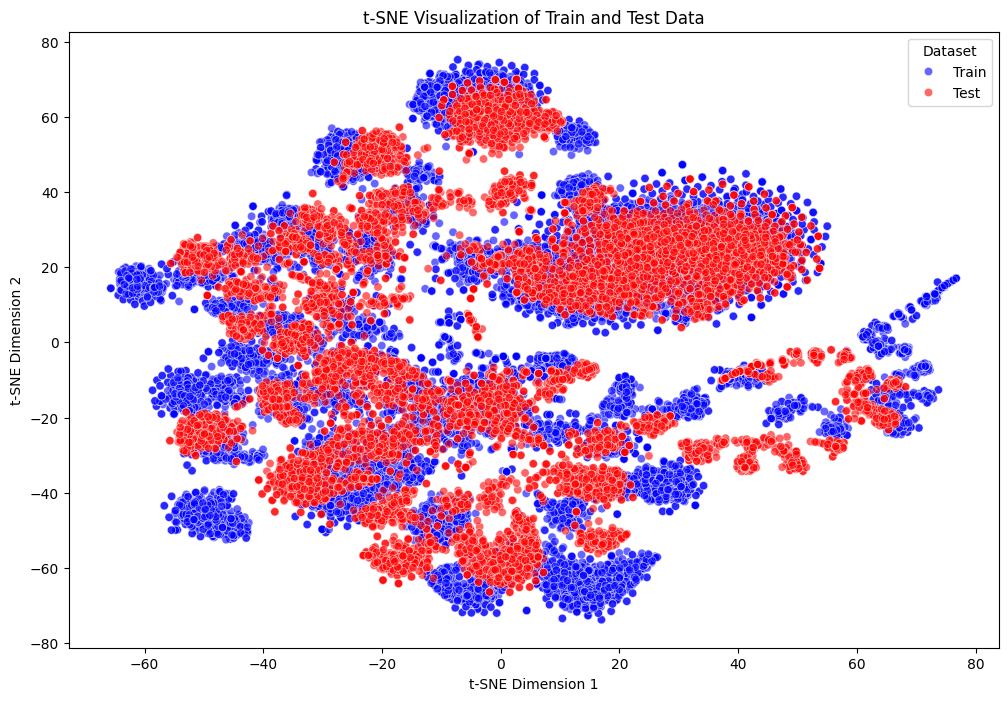

In [15]:
# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(train_features_df_fillna)
X_test = scaler.transform(test_features_df_fillna)

# t-SNE 모델 설정
tsne = TSNE(n_components=2, random_state=42)

# t-SNE 적용
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

# 결과를 데이터프레임으로 변환
train_tsne_df = pd.DataFrame(X_train_tsne, columns=['Dim1', 'Dim2'])
test_tsne_df = pd.DataFrame(X_test_tsne, columns=['Dim1', 'Dim2'])
train_tsne_df['Dataset'] = 'Train'
test_tsne_df['Dataset'] = 'Test'

# 두 데이터프레임 결합
tsne_df = pd.concat([train_tsne_df, test_tsne_df], ignore_index=True)

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='Dataset', palette={'Train': 'blue', 'Test': 'red'}, alpha=0.6)
plt.title('t-SNE Visualization of Train and Test Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Dataset')
plt.show()